In [1]:
import pickle
import tensorflow as tf
import tensorflow as tff
from tensorflow.contrib.layers import flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file = "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#print(y_test)

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
# ### Data exploration visualization code goes here.
# ### Feel free to use as many code cells as needed.

# #Visualising 10 random images from training set
# #These are some images out of thousands which will train the brain of our model 
# #to recognise the traffic signs correctly
# for i in np.random.randint(low=0, high=n_train-1, size=5):
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(X_train[i])
#     ax1.set_title(y_train[i], fontsize=30)
#     ax2.imshow(X_train[i+100])
#     ax2.set_title(y_train[i+100], fontsize=30)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#     plt.show()

# %matplotlib inline

In [5]:
# #A histogram to understand the distribution of the classes in our training set
# #will help is visualize the number of inputs available for each class
# plt.hist(y_train, bins=n_classes)
# plt.xlabel("Class label")
# plt.ylabel("Frequency")
# plt.show()
# distribution, classes = np.histogram(y_train, bins=np.arange(n_classes), density=True)

In [6]:
#Converting the images to grayscale
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


In [7]:
#Normalising the datasets
X_train_normalized = (X_train - 128)/128
X_valid_normalized = (X_valid - 128)/128
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))
print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

82.677589037
83.5564273756
82.1484603612
-0.354081335648
-0.347215411128
-0.358215153428


In [35]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 50
BATCH_SIZE = 50

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
#     fc1 = tf.nn.dropout(fc1, 0.5)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
#     fc2 = tf.nn.dropout(fc2, 0.5)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [36]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, None)
one_hot_y = tf.one_hot(y, 43)

In [37]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [38]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetttt')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.761

EPOCH 2 ...
Validation Accuracy = 0.855

EPOCH 3 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.888

EPOCH 5 ...
Validation Accuracy = 0.867

EPOCH 6 ...
Validation Accuracy = 0.890

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.896

EPOCH 10 ...
Validation Accuracy = 0.899

EPOCH 11 ...
Validation Accuracy = 0.911

EPOCH 12 ...
Validation Accuracy = 0.895

EPOCH 13 ...
Validation Accuracy = 0.913

EPOCH 14 ...
Validation Accuracy = 0.903

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.891

EPOCH 17 ...
Validation Accuracy = 0.915

EPOCH 18 ...
Validation Accuracy = 0.909

EPOCH 19 ...
Validation Accuracy = 0.908

EPOCH 20 ...
Validation Accuracy = 0.916

EPOCH 21 ...
Validation Accuracy = 0.919

EPOCH 22 ...
Validation Accuracy = 0.930

EPOCH 23 ...
Validation Accuracy = 0.913

EPOCH 24 ...
Validation Accura

In [40]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetttt
Test Accuracy = 0.931


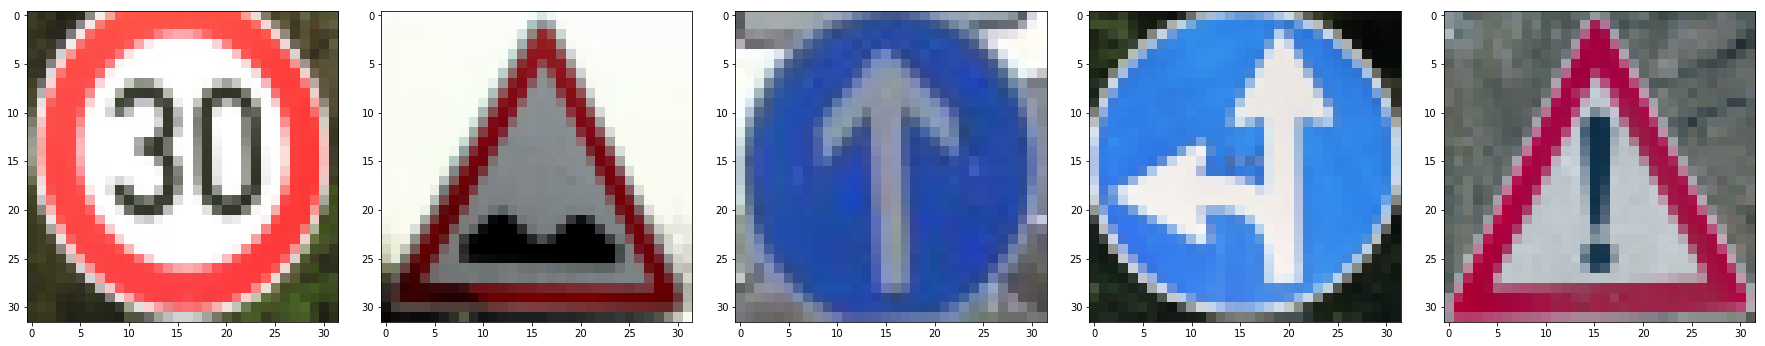

(5, 32, 32, 3)
(5, 32, 32, 1)


In [41]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import glob
import matplotlib.image as mpimg
import cv2 as cv2

my_images = np.empty((0,32,32,3))
my_labels = np.array([1, 22, 35, 37, 18])
#my_labels = np.array([4])


images = glob.glob("my_images/a.png")
for image in images :
    img = mpimg.imread(image)
#     print(img.shape)
#     if len(img.shape) > 2 and img.shape[2] == 4:
#         img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    my_images = np.append(my_images, np.array([img]), axis=0)
images = glob.glob("my_images/b.png")
for image in images :
    img = mpimg.imread(image)
    my_images = np.append(my_images, np.array([img]), axis=0)
images = glob.glob("my_images/c.png")
for image in images :
    img = mpimg.imread(image)
    my_images = np.append(my_images, np.array([img]), axis=0)
images = glob.glob("my_images/d.png")
for image in images :
    img = mpimg.imread(image)
    my_images = np.append(my_images, np.array([img]), axis=0)
images = glob.glob("my_images/e.png")
for image in images :
    img = mpimg.imread(image)
    my_images = np.append(my_images, np.array([img]), axis=0)
    
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 9))
f.tight_layout()
ax1.imshow(my_images[0])
ax2.imshow(my_images[1])
ax3.imshow(my_images[2])
ax4.imshow(my_images[3])
ax5.imshow(my_images[4])
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

my_images = np.asarray(my_images)
my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)
my_images_normalized = (my_images_gry - 128)/128 
print(my_images.shape)
print(my_images_normalized.shape)

# f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 9))
# f.tight_layout()
# ax1.imshow(my_images_normalized[0].squeeze(), cmap='gray')
# ax2.imshow(my_images_normalized[1].squeeze(), cmap='gray')
# ax3.imshow(my_images_normalized[2].squeeze(), cmap='gray')
# ax4.imshow(my_images_normalized[3].squeeze(), cmap='gray')
# ax5.imshow(my_images_normalized[4].squeeze(), cmap='gray')
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.show()

In [42]:
# ### Run the predictions here and use the model to output the prediction for each image.
# ### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
# ### Feel free to use as many code cells as needed.


with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     saver2 = tf.train.import_meta_graph('./lenettt.meta')
#     saver2.restore(sess, "./lenet")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetttt
Test Set Accuracy = 0.000


In [43]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, y:my_labels})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, y:my_labels})
#     my_softmax_logits = sess.run(softmax_logits, feed_dict={x:X_valid, y:y_valid})
#     my_top_k = sess.run(top_k, feed_dict={x: X_valid, y:y_valid})
    
print(my_top_k[0][0])
print(my_top_k[0][1])
print(my_top_k[0][2])
print(my_top_k[0][3])
print(my_top_k[0][4])
    
print(my_top_k[1][0])
print(my_top_k[1][1])
print(my_top_k[1][2])
print(my_top_k[1][3])
print(my_top_k[1][4])

INFO:tensorflow:Restoring parameters from ./lenetttt
[ 0.28021598  0.25440809  0.18816598]
[ 0.37490165  0.22440352  0.21656907]
[ 0.38199264  0.30702224  0.14139478]
[ 0.28171653  0.18704276  0.18374209]
[ 0.30076841  0.21938275  0.179773  ]
[ 3 12  9]
[ 3  9 25]
[ 3  9 12]
[ 9  3 12]
[25 12  3]
